# Load Generated and Reference Data

Generated Recipes (GPT3)

In [1]:
from google.colab import drive
import ast
import nltk
nltk.download('punkt')
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mounted at /content/drive


In [2]:
import pandas as pd
def get_generated_recipes(filepath):
  df1 = pd.read_csv(filepath)
  ingredients_input = list(df1['Ingredients'].apply(ast.literal_eval)) # ingredients list sent as input
  ingredients_input = [[x.lower() for x in ingredients] for ingredients in ingredients_input]
  return list(df1['Generated Recipe']), ingredients_input

In [96]:
path = '/content/drive/MyDrive/NLP244FinalProject/GeneratedRecipes(ValidationData)/recipes_hyp4.csv'
generated_recipes, ingredients_input = get_generated_recipes(path)# list of strings

Reference Recipes

In [ ]:
"""Reference recipes are stored in df with columns: NER, title, ingredients, directions
   Added extra column recipe that matches format of GPT: 
   [title]\nIngredients: \n- [-ingredients]\n\nInstructios: \n[directions]
   If generated recipes are in the same column format, use:
   import ast
   df_ref['ingredients']=df_ref['ingredients'].apply(ast.literal_eval)
   df_ref['directions']=df_ref['directions'].apply(ast.literal_eval)
   df_ref['directions'] = df_ref['directions'].apply(lambda x: [i for i in x if i!=''])
   Then concatenate into new recipe column:
   df_ref["recipe"] = df_ref['title']+'\n\n' + df_ref['ingredients'].str.join('\n ') + '\n\n' + df_ref["directions"].str.join('\n ')
   For both reference and generated.
   """

'Reference recipes are stored in df with columns: NER, title, ingredients, directions\n   Added extra column recipe that matches format of GPT: \n   [title]\nIngredients: \n- [-ingredients]\n\nInstructios: \n[directions]\n   If generated recipes are in the same column format, use:\n   import ast\n   df_ref[\'ingredients\']=df_ref[\'ingredients\'].apply(ast.literal_eval)\n   df_ref[\'directions\']=df_ref[\'directions\'].apply(ast.literal_eval)\n   df_ref[\'directions\'] = df_ref[\'directions\'].apply(lambda x: [i for i in x if i!=\'\'])\n   Then concatenate into new recipe column:\n   df_ref["recipe"] = df_ref[\'title\']+\'\n\n\' + df_ref[\'ingredients\'].str.join(\'\n \') + \'\n\n\' + df_ref["directions"].str.join(\'\n \')\n   For both reference and generated.\n   '

In [4]:
import ast
def get_reference_recipes(filepath):
  df_ref = pd.read_csv(filepath)
  df_ref['ingredients']=df_ref['ingredients'].apply(ast.literal_eval)
  df_ref['directions']=df_ref['directions'].apply(ast.literal_eval)#.str.join('\n ')
  df_ref['directions'] = df_ref['directions'].apply(lambda x: [i for i in x if i!=''])
  df_ref['directions'] = df_ref['directions'].apply(lambda x: [str(i+1)+'. '+dir for i,dir in enumerate(x)])
  df_ref["recipe"] = df_ref['title']+'\nIngredients: \n- ' + df_ref['ingredients'].str.join('\n- ') + '\n\nDirections: \n' + df_ref["directions"].str.join('\n')
  return list(df_ref['recipe'])

In [97]:
path_ref = '/content/drive/MyDrive/NLP244FinalProject/GeneratedRecipes(ValidationData)/reference_validation_recipes.csv'
reference_recipes = get_reference_recipes(path_ref)

In [98]:
reference_recipes[0]

'Moms Pie Dough \nIngredients: \n- 4.5 Cups Flour\n- 1.5 Tsp Salt\n- Pinch Baking Powder\n- 1 Tbls Sugar\n- 1 2/3 cup Crisco\n- 1 egg lightly beaten\n- 1 tsp vinegar\n- Ice Water\n\nDirections: \n1. Mix all dry ingredients in a bowl.\n2. Add crisco and cut in with dough cutter.\n3. Mix wet ingredients adding ice water to make 1 total cup of wet ingredients.\n4. Add wet to dry, starting with 1/2 cup of wet ingredients.\n5. Make dough and chill'

Retrieve Instruction Only Recipes

In [57]:
def get_instruction_recipe(recipes):
    keyword1 = "instructions"
    keyword2 = "directions"
    instructions = []
    for i, recipe in enumerate(recipes):
        index1 = recipe.lower().find(keyword1)
        index2 = recipe.lower().find(keyword2)
        if index1 != -1:
            substring = recipe[index1 + len(keyword1):] # Adding len(keyword) to skip the keyword itself
            instructions.append(substring)
        elif index2 != -1:
            substring = recipe[index2 + len(keyword2):] # Adding len(keyword) to skip the keyword itself
            instructions.append(substring)
        else:
            instructions.append(" ")
            print(i)
            print("Can't retreive instructions for this data")
            print("Append Empty String")


    return instructions

In [99]:
instruction_only_generated_recipes = get_instruction_recipe(generated_recipes)# list of strings
instruction_only_reference_recipes = get_instruction_recipe(reference_recipes)# list of strings

37
Can't retreive instructions for this data
Append Empty String
95
Can't retreive instructions for this data
Append Empty String


Shared Generated and Reference Recipes 

In [23]:
def get_recipes(filepath):
  df_ref = pd.read_csv(filepath)
  df_ref['ingredients']=df_ref['ingredients'].apply(ast.literal_eval)
  df_ref['NER']=df_ref['NER'].apply(ast.literal_eval)
  df_ref['directions']=df_ref['directions'].apply(ast.literal_eval)#.str.join('\n ')
  df_ref['directions'] = df_ref['directions'].apply(lambda x: [i for i in x if i!=''])
  df_ref['directions'] = df_ref['directions'].apply(lambda x: [str(i+1)+'. '+dir for i,dir in enumerate(x)])
  df_ref["recipe"] = 'Ingredients: \n- ' + df_ref['ingredients'].str.join('\n- ') + '\n\nInstructions: \n' + df_ref["directions"].str.join('\n')
  df_ref.sort_values(by=['NER'])
  return list(df_ref['recipe']), list(df_ref['NER']),list(df_ref['ingredients'])

In [40]:
ref_path = '/content/drive/MyDrive/NLP244FinalProject/GeneratedRecipes(ValidationData)/reference_validation_recipes.csv'
# T5 baseline
gen_path = '/content/drive/MyDrive/NLP244FinalProject/GeneratedRecipes(ValidationData)/T5_output.csv'

In [44]:
reference_recipes, _, _ = get_recipes(ref_path)
generated_recipes, ingredients_input, generated_ingredients = get_recipes(gen_path)

In [45]:
generated_ingredients[10]

[' 1 lb. ground sausage',
 ' 10 oz. pkg. noodles',
 ' 1/8 tsp. rosemary',
 ' 1/8 tsp. basil',
 ' 1/8 tsp. cayenne pepper',
 ' 1/4 tsp. sage',
 ' 1/4 tsp. oregano',
 ' 1 bell pepper',
 ' 1/2 onion',
 ' 1 can cheese sauce watch out for clumps',
 ' 1 8 oz. pkg. mozzarella cheese']

# Jaccard Coefficient & Adjusted Precision & Adjusted Recall

In [ ]:
# to measure the overlap between ingredients within the ingredient list 
# and extracted ingredients from the instructions

Preprocess Ingredients

In [100]:
# Run this for GPT3 recipes
generated_ingredients = []
for eg in generated_recipes:
  start = eg.find("Ingredients")
  end = eg.find("Directions")
  if end==-1:
    end = eg.find("Instructions")
  substring = eg[start+len("Ingredients "):end]
  sublist = substring.split('\n')
  sublist = [x for x in sublist if x!='' and 'optional' not in x]
  if end ==-1 or start==-1:
    sublist=[]
  generated_ingredients.append(sublist)

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.tokenize import word_tokenize

measurement = ['cup', 'cups','can','cans','teaspoon','teaspoons','tsp','tablespoon','tablespoons', 'tbsp','ounce','ounces']
def preprocess_ingredients(ingredients):
    preprocessed_ingredients = []
    for i,ingredient in enumerate(ingredients):
        words = word_tokenize(ingredient)
        # Remove any words that are measurement units or numbers
        words = [word.lower() for word in words if word.isalpha() and word not in measurement]
        preprocessed_ingredient = ' '.join(words)
        if preprocessed_ingredient!='':
          preprocessed_ingredients.append(preprocessed_ingredient)
    return preprocessed_ingredients

In [101]:
generated_ingredients_extracted = [preprocess_ingredients(x) for x in generated_ingredients]

In [104]:
ingredients_input[63] # actual list

['vegetable stock cube',
 'fish sauce',
 'lemon-grass stem',
 'fresh kaffir lime',
 'fresh ginger',
 'birdseye chillies',
 'garlic',
 'stalks and roots',
 'wontons',
 'chicken mince',
 'garlic',
 'green shallot',
 'lemon rind',
 'wonton wrappers',
 'green shallots']

In [48]:
# only run this for t5
#ingredients_input = [l[0].split(', ') for l in ingredients_input]

In [105]:
generated_ingredients_extracted[63]  # extracted from generated recipe

['vegetable stock cube',
 'water',
 'fish sauce',
 'stalks stems',
 'fresh kaffir lime leaves',
 'slices fresh ginger',
 'chillies',
 'cloves garlic diced',
 'stalks and roots of celery',
 'carrots diced',
 'wontons',
 'chicken mince',
 'cloves garlic minced',
 'green shallots',
 'lemon rind',
 'wonton wrappers',
 'green shallots chopped']

Jaccard Coefficient

In [ ]:
# Define a function to compute the Jaccard coefficient for two sets
"""def calculate_jaccard_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    jaccard_coefficient = len(intersection) / len(union)
    return jaccard_coefficient"""

'def calculate_jaccard_coefficient(set1, set2):\n    intersection = set1.intersection(set2)\n    union = set1.union(set2)\n    jaccard_coefficient = len(intersection) / len(union)\n    return jaccard_coefficient'

In [30]:
def check_intersection(ging, ing):
  # Empty space added to ensure it is a separate word
  # Also checks for plurals of words
  # Checks both ways 
  if ' '+ing+' ' in ging or ' '+ing+'s' in ging or ' '+ing+'es' in ging or ging in ' '+ing+' ' or ging+'s' in ' '+ing+' 'or ging+'es' in ' '+ing+' ':
    return True
  return False

In [19]:
# Define a function to compute Jaccard coefficient using matches instead of intersections
def calculate_jaccard_coefficient(list1, list2):
    """ list1: list of extracted ingredients
        list2: list of input ingredients
    """
    num_matches=0

    # Remove duplicates from original
    list2=list(set(list2))

    # Make copies to count leftover ingredients not in the intersection
    list1_copy = [' '+ item + ' ' for item in list1] 
    list2_copy = [' ' + item + ' ' for item in list2]

    # For every ingredient in input, is it present in extracted ingredients?

    for ing in list2: # using original otherwise remove messes up the loop and all the ingredients aren't checked
      # uncomment below for debugging
      #print('input ingredient: '+ing) 
      for ging in list1_copy: # using copy to get list of leftover ingredients after removal
        # uncomment below for debugging
        #print('extracted ingredient: '+ging)
        if check_intersection(ging,ing):
          num_matches+=1
          list2_copy.remove(' '+ing+' ')
          list1_copy.remove(ging)
          break
    jaccard_coefficient = num_matches / (len(list1_copy)+len(list2_copy)+num_matches)
    return jaccard_coefficient

In [20]:
def calculate_adjusted_precision(list1, list2):
    count=0

    # Remove duplicates from original
    list2=list(set(list2))
    
    # Make copies to count leftover ingredients not in the intersection
    list1_copy = [' '+ item + ' ' for item in list1] 
    list2_copy = [' ' + item + ' ' for item in list2]

    # For every ingredient in input, is it present in extracted ingredients?

    for ing in list2: # using original otherwise remove messes up the loop and all the ingredients aren't checked
      # uncomment below for debugging
      #print('input ingredient: '+ing) 
      for ging in list1_copy: # using copy to get list of leftover ingredients after removal
        # uncomment below for debugging
        #print('extracted ingredient: '+ging)
        if check_intersection(ging,ing):
          count+=1
          list2_copy.remove(' '+ing+' ')
          list1_copy.remove(ging)
          break
    precision = (len(list1)-count) / len(list2)
    return precision

def calculate_adjusted_recall(list1, list2):
    count=0

    # Remove duplicates from original
    list2=list(set(list2))
    
    # Make copies to count leftover ingredients not in the intersection
    list1_copy = [' '+ item + ' ' for item in list1] 
    list2_copy = [' ' + item + ' ' for item in list2]

    # For every ingredient in input, is it present in extracted ingredients?

    for ing in list2: # using original otherwise remove messes up the loop and all the ingredients aren't checked
      # uncomment below for debugging
      #print('input ingredient: '+ing) 
      for ging in list1_copy: # using copy to get list of leftover ingredients after removal
        # uncomment below for debugging
        #print('extracted ingredient: '+ging)
        if check_intersection(ging,ing):
          count+=1
          list2_copy.remove(' '+ing+' ')
          list1_copy.remove(ging)
          break
    recall = count / len(list2)
    return recall

In [106]:
print(calculate_jaccard_coefficient(generated_ingredients_extracted[11], ingredients_input[11]))
print(calculate_adjusted_precision(generated_ingredients_extracted[11], ingredients_input[11]))
print(calculate_adjusted_recall(generated_ingredients_extracted[11], ingredients_input[11]))

1.0
0.0
1.0


In [107]:
# Compute Jaccard coefficient for each generated recipe
jaccard_coefficients = []
adjusted_precisions = []
adjusted_recalls = []
# oh gosh this is so confusing but generated_ingredients_jaccard -> list of ingredients in each recipe list(list)
# genrated recipe here is just each list of ingredients idk what to call that variable

for i,gi in enumerate(generated_ingredients_extracted):
    #generated_ingr = set(gi) # set of generated ingredients per recipe
    #reference_ingr = set(ingredients_input[i]) # set of actual ingredients 
    jaccard_coefficient = calculate_jaccard_coefficient(gi, ingredients_input[i])
    adjusted_precision = calculate_adjusted_precision(gi, ingredients_input[i])
    adjusted_recall = calculate_adjusted_recall(gi, ingredients_input[i])

    jaccard_coefficients.append(jaccard_coefficient)
    adjusted_precisions.append(adjusted_precision)
    adjusted_recalls.append(adjusted_recall)
# Calculate average Jaccard coefficient
avg_jaccard_coefficient = sum(jaccard_coefficients) / len(jaccard_coefficients)
avg_adjusted_precision = sum(adjusted_precisions) / len(adjusted_precisions)
avg_adjusted_recall = sum(adjusted_recalls) / len(adjusted_recalls)
# Print the average Jaccard coefficient
print("Average Jaccard coefficient: {:.8f}".format(avg_jaccard_coefficient))
print("Average Adjusted Precision: {:.8f}".format(avg_adjusted_precision))
print("Average Adjusted Recall: {:.8f}".format(avg_adjusted_recall))

Average Jaccard coefficient: 0.77936392
Average Adjusted Precision: 0.22382366
Average Adjusted Recall: 0.87204970


# N-Gram Repetition

In [ ]:
import nltk

# Define the value of n for n-gram
n = 3

generated_ngrams = []
reference_ngrams = []

for recipe in generated_recipes:

    words = nltk.word_tokenize(recipe.lower())
    ngrams = list(nltk.ngrams(words, n))
    generated_ngrams.extend(ngrams)

for recipe in reference_recipes:

    words = nltk.word_tokenize(recipe.lower())
    ngrams = list(nltk.ngrams(words, n))
    reference_ngrams.extend(ngrams)

# Calculate the frequency of n-grams in the generated recipes
generated_freq_dist = nltk.FreqDist(generated_ngrams)
# Calculate the frequency of n-grams in the reference recipes
reference_freq_dist = nltk.FreqDist(reference_ngrams)

# Calculate the repetition rate in generated recipes
num_repeated = sum(1 for count in generated_freq_dist.values() if count > 1)
total_freq = sum(generated_freq_dist.values())
generated_repetition_rate = num_repeated/total_freq
print(f"{n}-gram repetition rate for generated recipe: {generated_repetition_rate:.8f}")
# Calculate the repetition rate in reference recipes
num_repeated = sum(1 for count in reference_freq_dist.values() if count > 1)
total_freq = sum(reference_freq_dist.values())
reference_repetition_rate = num_repeated/total_freq
print(f"{n}-gram repetition rate for reference recipe: {reference_repetition_rate:.8f}")

3-gram repetition rate for generated recipe: 0.11437035
3-gram repetition rate for reference recipe: 0.09447200


# Mean Log Unigram Probabililty

In [ ]:
import math
def mean_log_unigram_prob(recipes):
    mean_log_prob = 0
    for recipe in recipes:
        words = recipe.lower().split()
        total_log_prob = 0
        fdist = nltk.FreqDist(words)

        total_words = len(words)
        # Calculate the probability of each word appearing in the text
        word_probs = {word: freq/total_words for word, freq in fdist.items()}

        # Calculate the logarithm of the probability of each word
        log_probs = {word: math.log(prob) for word, prob in word_probs.items()}

        # Calculate the mean of the logarithms of the probabilities
        mean_log_prob += sum(log_probs.values()) / len(words)
        # Return the result
    return mean_log_prob/len(recipes)

In [ ]:
print("Mean Log Unigram Probabililty for generated recipe:", mean_log_unigram_prob(instruction_only_generated_recipes))
print("Mean Log Unigram Probabililty for reference recipe:", mean_log_unigram_prob(instruction_only_reference_recipes))

Mean Log Unigram Probabililty for generated recipe: -3.2415221211290177
Mean Log Unigram Probabililty for reference recipe: -3.2573265581919784


In [ ]:
import matplotlib.pyplot as plt
def graph_probability_distribution(recipe):
    words = recipe.lower().replace('\n', '').split()
    fdist = nltk.FreqDist(words)

    total_words = len(words)
    # Calculate the probability of each word appearing in the text
    word_probs = {word: freq/total_words for word, freq in fdist.items()}
    prob_list = [word_probs[word] for word in words]
    plt.plot(prob_list)
    plt.xlabel('Word index')
    plt.ylabel('Probability')
    plt.show()

generated word probability


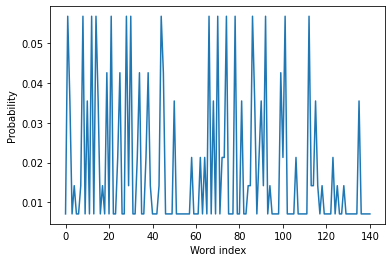

reference word probability


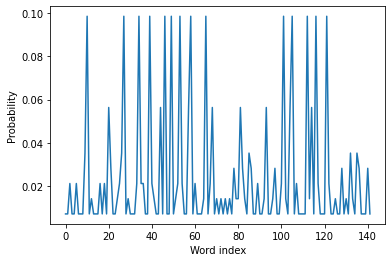

In [ ]:
closest_string = min(instruction_only_generated_recipes, key=lambda x: abs(len(x) - 800)) # get the string that is closest to the length 800
print("generated word probability")
graph_probability_distribution(closest_string)
closest_string = min(instruction_only_reference_recipes, key=lambda x: abs(len(x) - 800)) # get the string that is closest to the length 800
print("reference word probability")
graph_probability_distribution(closest_string)